# AgroForestry Analysis

Agroforestry has enormous potential for reducing the poverty, enhancing the livelihood, improving the food security and mitigating the climate change. <br>
In this analysis, agroforest estimation over the period of 5 years (between 2017 to 2021) has been done and DPPD has been also analysed


In [1]:
import geopandas as gpd

import georasters as gr
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import datetime as dt
from matplotlib.colors import TwoSlopeNorm

import os
from rasterio.mask import mask
import pycrs
import json

import warnings
warnings.filterwarnings("ignore")

/home/luckyw0w/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


All LULC file of Telangana from year 2017 to 2021 has been read using rasterio

In [ ]:
dataset = rasterio.open('LULC/01-01-2017.tif', 'r')
img2017 = dataset.read(1)
dataset = rasterio.open('LULC/01-01-2018.tif', 'r')
img2018 = dataset.read(1)
dataset = rasterio.open('LULC/01-01-2019.tif', 'r')
img2019 = dataset.read(1)
dataset = rasterio.open('LULC/01-01-2020.tif', 'r')
img2020 = dataset.read(1)
dataset = rasterio.open('LULC/01-01-2021.tif', 'r')
img2021 = dataset.read(1)

Function to clip LULC file as per mandal/district boundary

In [ ]:
def getFeatures(gdf,i):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    return [json.loads(gdf.to_json())['features'][i]['geometry']]

Mandal boundary of telangana has been read and crs has been set according to LULC files

A function has been create to estimate Agroforest area for each given boundary

In [ ]:
def agroforesarea(geo,index):
    #Mandal boundary of telangana has been read and crs has been set according to LULC files
    dataset = rasterio.open('LULC/01-01-2017.tif', 'r')    
    geo = geo.to_crs(crs=dataset.crs.data)

    coords = getFeatures(geo,index)           #read each boundary as a feature
    out_img, out_transform = mask(dataset, coords, crop=True)   #clip LULC using that feature

    out_meta = dataset.meta.copy()           #copy lulc information to create tif file of masked lulc file
    epsg_code = int(dataset.crs.data['init'][5:])           #retrive epsg code 
    out_meta.update({"driver": "GTiff",
                    "height": out_img.shape[1],
                    "width": out_img.shape[2],
                    "transform": out_transform,
                    "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                    )            #create metadata for tif file

    with rasterio.open('mandal2017.tif', "w", **out_meta) as dest:
        dest.write(out_img)          #open tif file using arsterio and write masked image and metadata

    #------------------__#- SAME PROCESS OF YEAR 2018---------------_______-----#######
    dataset = rasterio.open('LULC/01-01-2018.tif', 'r')          
    geo = geo.to_crs(crs=dataset.crs.data)

    coords = getFeatures(geo,index)
    out_img, out_transform = mask(dataset, coords, crop=True)

    out_meta = dataset.meta.copy()
    epsg_code = int(dataset.crs.data['init'][5:])
    out_meta.update({"driver": "GTiff",
                    "height": out_img.shape[1],
                    "width": out_img.shape[2],
                    "transform": out_transform,
                    "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                    )

    with rasterio.open('mandal2018.tif', "w", **out_meta) as dest:
        dest.write(out_img)

    #------------------__#- SAME PROCESS OF YEAR 2019---------------_______-----#######
    dataset = rasterio.open('LULC/01-01-2019.tif', 'r')
    geo = geo.to_crs(crs=dataset.crs.data)

    coords = getFeatures(geo,index)
    out_img, out_transform = mask(dataset, coords, crop=True)

    out_meta = dataset.meta.copy()
    epsg_code = int(dataset.crs.data['init'][5:])
    out_meta.update({"driver": "GTiff",
                    "height": out_img.shape[1],
                    "width": out_img.shape[2],
                    "transform": out_transform,
                    "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                    )

    with rasterio.open('mandal2019.tif', "w", **out_meta) as dest:
        dest.write(out_img)

    #------------------__#- SAME PROCESS OF YEAR 2020---------------_______-----#######
    dataset = rasterio.open('LULC/01-01-2020.tif', 'r')
    geo = geo.to_crs(crs=dataset.crs.data)

    coords = getFeatures(geo,index)
    out_img, out_transform = mask(dataset, coords, crop=True)

    out_meta = dataset.meta.copy()
    epsg_code = int(dataset.crs.data['init'][5:])
    out_meta.update({"driver": "GTiff",
                    "height": out_img.shape[1],
                    "width": out_img.shape[2],
                    "transform": out_transform,
                    "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                    )

    with rasterio.open('mandal2020.tif', "w", **out_meta) as dest:
        dest.write(out_img)

    #------------------__#- - SAME PROCESS OF YEAR 2021--------------_______-----#######

    dataset = rasterio.open('LULC/01-01-2021.tif', 'r')
    geo = geo.to_crs(crs=dataset.crs.data)

    coords = getFeatures(geo,index)
    out_img, out_transform = mask(dataset, coords, crop=True)

    out_meta = dataset.meta.copy()
    epsg_code = int(dataset.crs.data['init'][5:])
    out_meta.update({"driver": "GTiff",
                    "height": out_img.shape[1],
                    "width": out_img.shape[2],
                    "transform": out_transform,
                    "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                    )

    with rasterio.open('mandal2021.tif', "w", **out_meta) as dest:
        dest.write(out_img)

    #-------- READ ALL MANDAL TIFFS AS PANDAS DATAFRAME ----------------#
    myRaster = 'mandal2017.tif'
    lulc2017 = gr.from_file(myRaster)
    lulc2017 = lulc2017.to_pandas()

    myRaster = 'mandal2018.tif'
    lulc2018 = gr.from_file(myRaster)
    lulc2018 = lulc2018.to_pandas()

    myRaster = 'mandal2019.tif'
    lulc2019 = gr.from_file(myRaster)
    lulc2019 = lulc2019.to_pandas()

    myRaster = 'mandal2020.tif'
    lulc2020 = gr.from_file(myRaster)
    lulc2020 = lulc2020.to_pandas()

    myRaster = 'mandal2021.tif'
    lulc2021 = gr.from_file(myRaster)
    lulc2021 = lulc2021.to_pandas()
    
    #-----------RENAME COLUMNS OF VALUES------______#
    lulc2017.rename(columns = {'value':'value2017'}, inplace = True)
    lulc2018.rename(columns = {'value':'value2018'}, inplace = True)
    lulc2019.rename(columns = {'value':'value2019'}, inplace = True)
    lulc2020.rename(columns = {'value':'value2020'}, inplace = True)
    lulc2021.rename(columns = {'value':'value2021'}, inplace = True)
    #------------------MERGE ALL LULC------_____#
    
    df_cd = pd.merge(lulc2017, lulc2018, how='inner', left_on = ['row','col'], right_on = ['row','col'])
    df_cd = pd.merge(df_cd, lulc2019, how='inner', left_on = ['row','col'], right_on = ['row','col'])
    df_cd = pd.merge(df_cd, lulc2020, how='inner', left_on = ['row','col'], right_on = ['row','col'])
    df_cd = pd.merge(df_cd, lulc2021, how='inner', left_on = ['row','col'], right_on = ['row','col'])

    #--------SELECT ALL VALUES FOR first to last YEARS-------#
    
    lulcdf = df_cd[['value2017','value2018','value2019','value2020','value2021']]

    lulcdf17_21 = lulcdf.loc[lulcdf['value2017'] == 5]             #select crop area from 2017
    lulcdf17_21 = lulcdf17_21.loc[lulcdf17_21['value2021'] == 2]             #select tree cover area from 2021

    lulcdf17_20 = lulcdf.loc[lulcdf['value2017'] == 5]             #select crop area from 2017
    lulcdf17_20 = lulcdf17_20.loc[lulcdf17_20['value2020'] == 2]             #select tree cover area from 2020

    lulcdf17_19 = lulcdf.loc[lulcdf['value2017'] == 5]             #select crop area from 2017
    lulcdf17_19 = lulcdf17_19.loc[lulcdf17_19['value2019'] == 2]             #select tree cover area from 2019

    lulcdf17_18 = lulcdf.loc[lulcdf['value2017'] == 5]             #select crop area from 2017
    lulcdf17_18 = lulcdf17_18.loc[lulcdf['value2018'] == 2]             #select tree cover area from 2018

    #--------SELECT ALL VALUES FOR corresponding  YEARS-------#
    lulcdf20_21 = lulcdf.loc[lulcdf['value2020'] == 5]             #select crop area from 2020
    lulcdf20_21 = lulcdf20_21.loc[lulcdf20_21['value2021'] == 2]             #select tree cover area from 2021

    lulcdf19_20 = lulcdf.loc[lulcdf['value2019'] == 5]             #select crop area from 2018
    lulcdf19_20 = lulcdf19_20.loc[lulcdf19_20['value2020'] == 2]             #select tree cover area from 220

    lulcdf18_19 = lulcdf.loc[lulcdf['value2018'] == 5]             #select crop area from 2018
    lulcdf18_19 = lulcdf18_19.loc[lulcdf18_19['value2019'] == 2]             #select tree cover area from 2019
    
    #calulate area in hectare from each crop class converted to tree cover over class different period of time
    area17_21 = len(lulcdf17_21)/100                                #calculate area hectare
    area17_20 = len(lulcdf17_20)/100                                #calculate area hectare
    area17_19 = len(lulcdf17_19)/100                                #calculate area hectare
    area17_18 = len(lulcdf17_18)/100                                #calculate area hectare
    area20_21 = len(lulcdf20_21)/100                                #calculate area hectare
    area19_20 = len(lulcdf19_20)/100                                #calculate area hectare 
    area18_19 = len(lulcdf18_19)/100                                #calculate area hectare           
    return area17_21, area17_20, area17_19, area17_18, area20_21, area19_20, area18_19

In [ ]:
geo = gpd.read_file('../../../../src/data_preprocessing/base_geojson/TS_mandal_boundary.json')
geo = geo[['Mandal_Nam','Dist_Name','geometry']]          #Create geodataframe with few data

In [ ]:
#create empty list to append areas of each boundary
area17_21list = []
area17_20list = []
area17_19list = []
area17_18list = []
area20_21list = []
area19_20list = []
area18_19list = []

#run loop for each boundary
for i in range(len(geo)):
    area17_21, area17_20, area17_19, area17_18, area20_21, area19_20, area18_19 = agroforesarea(geo,i)
    area17_21list.append(area17_21)
    area17_20list.append(area17_20)
    area17_19list.append(area17_19)
    area17_18list.append(area17_18)
    area20_21list.append(area20_21)
    area19_20list.append(area19_20)
    area18_19list.append(area18_19)
    #dflist.append(lulcdf)


In [ ]:
#append columns of areas in geodataframe of boundaries

geo['area17_21'] = area17_21list#*100 #(hectare)
geo['area17_20'] = area17_20list#*100 #(hectare)
geo['area17_19'] = area17_19list#*100 #(hectare)
geo['area17_18'] = area17_18list#*100 #(hectare)
geo['area20_21'] = area20_21list#*100 #(hectare)
geo['area19_20'] = area19_20list#*100 #(hectare)
geo['area18_19'] = area18_19list#*100 #(hectare)

In [ ]:
geo.to_file('agroforest_mandal.geojson', driver='GeoJSON')    #save areas' geodataframe

In [12]:
geo = gpd.read_file('agroforest_mandal.geojson')        #read file to verify results
geo

,Mandal_Nam,Dist_Name,area17_21,area17_20,area17_19,area17_18,area20_21,area19_20,area18_19,geometry
0,Abdullapurmet,Rangareddy,50.09,36.22,2.70,12.09,26.71,54.78,1.48,"POLYGON ((78.58558 17.34675, 78.60189 17.34188..."
1,Achampet,Nagarkurnool,2.36,11.27,0.96,1.80,3.14,0.37,2.91,"POLYGON ((79.06269 16.44607, 79.04739 16.45883..."
2,Adavidevulapally,Nalgonda,3.90,10.27,3.38,2.22,3.38,12.09,2.93,"POLYGON ((79.52430 16.72522, 79.48673 16.71371..."
3,Addagudur,Yadadri Bhuvanagiri,25.44,2.78,2.86,5.52,21.94,2.00,4.26,"POLYGON ((79.36517 17.48429, 79.34519 17.46905..."
4,Addakal,Mahabubnagar,0.00,0.10,0.61,1.41,0.00,0.00,0.04,"POLYGON ((78.00552 16.56734, 78.00110 16.57589..."
...,...,...,...,...,...,...,...,...,...,...
587,Yellareddypet,Rajanna Sircilla,1.09,5.76,0.04,0.02,1.32,8.97,0.11,"POLYGON ((78.74235 18.41570, 78.72122 18.42223..."
588,Yergatla,Nizamabad,1.54,1.97,0.01,0.00,0.28,1.00,0.00,"POLYGON ((78.50814 18.97132, 78.49690 18.97313..."
589,Yerrupalem,Khammam,289.68,218.43,383.16,6.54,235.92,115.17,729.10,"POLYGON ((80.47000 16.94077, 80.46556 16.92792..."
590,Zaffergadh,Jangoan,8.92,11.02,1.11,0.80,16.08,17.56,4.71,"POLYGON ((79.51447 17.79391, 79.51459 17.81810..."


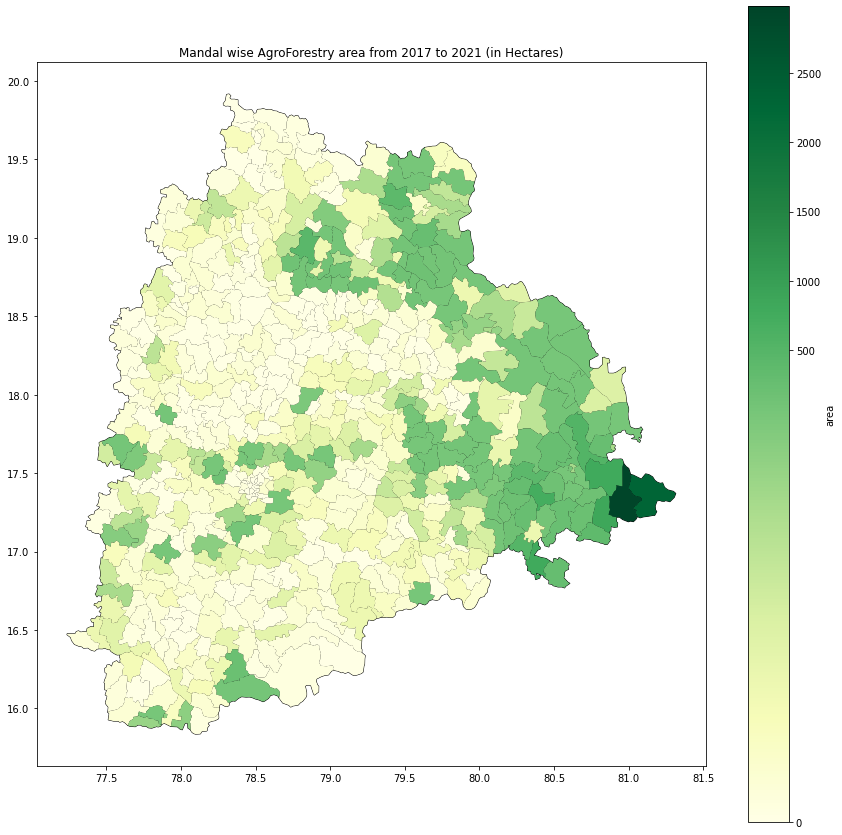

In [13]:
#PLOT AGROFOREST AREA MAP MANDAL WISE

vmin, vmax = geo['area17_21'].min() , geo['area17_21'].max()
vcenter = geo['area17_21'].mean()
norm = TwoSlopeNorm(vmin= vmin , vcenter=vcenter, vmax= vmax) 
# create a normalized colorbar
cmap = 'YlGn'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
base = geo.plot(color='white', edgecolor='black',figsize = [15,15])
geo.plot(ax = base,
    column = 'area17_21', 
                    legend = True, 
                    figsize = [15,15],\
                    legend_kwds = {'label': 'area'}, 
                    cmap = cmap,
        norm = norm)
plt.title('Mandal wise AgroForestry area from 2017 to 2021 (in Hectares)')
plt.savefig('agro2017_21_mandal.png', bbox_inches='tight')

### DPPD analysis mandal wise

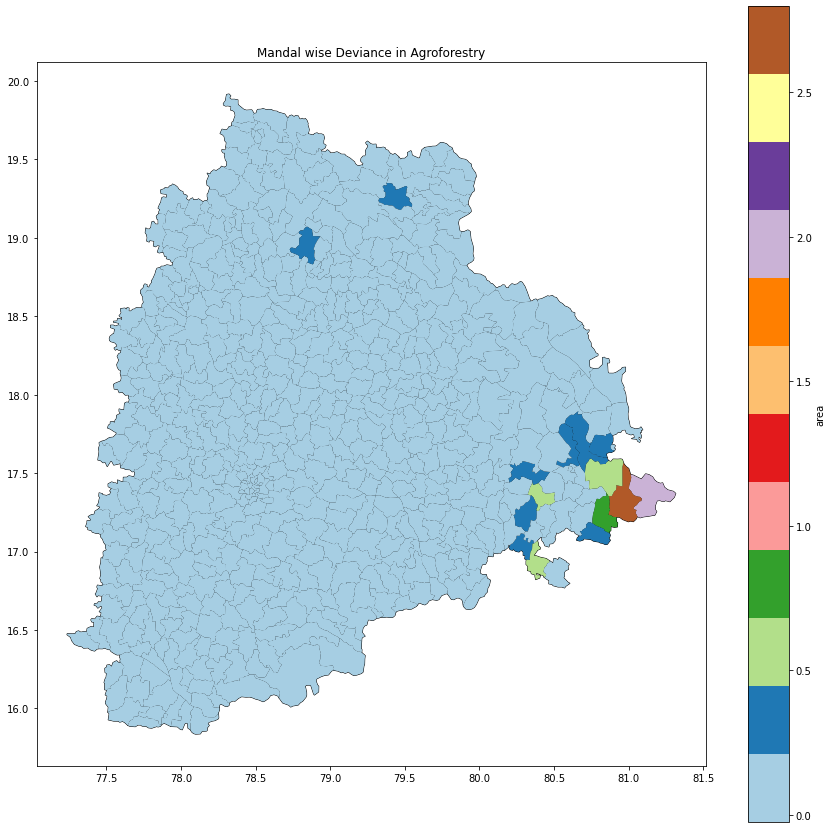

In [14]:
# Create a dataframe for calculate from year 2017 to 2021

deviance = geo[['area17_18','area17_19','area17_20','area17_21']]


deviance_T = deviance.transpose()

deviance_T = deviance_T.reset_index()
deviance_T['day'] = 1 
deviance_T['year'] = [2018, 2019, 2020, 2021]
deviance_T['month'] = 1
deviance_T['ModifiedDateTime'] = pd.to_datetime(deviance_T[['year', 'month', 'day']].astype('int64').astype('str'), yearfirst=True)
deviance_T['ModifiedDateTime_num'] = deviance_T['ModifiedDateTime'].map(dt.datetime.toordinal)


scores = []
# Calculate DPPD using Jesse's logic of Linear regression model for DPPD
for i in list(geo.index):
    
    #Set the data in the right format for Linear Regression
    X = np.array(deviance_T['ModifiedDateTime_num'])
    X = X.reshape(-1, 1)
    y = np.array(deviance_T[i])
    y = y.reshape(-1, 1)
  
    #Perform Linear Regression and obtain the slope
    reg = LinearRegression().fit(X, y)
    y_pred_trend = reg.predict(X)
    slope, intercept = np.polyfit(np.array(deviance_T['ModifiedDateTime_num']), y_pred_trend,1)
    line_slope = slope[0]

    scores.append(line_slope)

    #stack scores of each mandal in a list
scores = np.stack( scores, axis=0 )

#normalize DPPD scores
norm = (scores - scores.min())/ (scores.max() - scores.min())            #normnalize between 0 to 1
data_norm = (norm - 0.5)/ 0.5                                            #normnalize between -1 to 1
data_norm = scores 

'''
from scipy import stats
z = np.abs(stats.zscore(geo['deviance_5yr']))                                         #normnalize with z-score
'''

geo['deviance_5yr'] = list(data_norm)  #add DPPD normalized scores as a column 

# Plot deviance map
cmap = 'Paired'

base = geo.plot(color='white', edgecolor='black',figsize = [15,15])
geo.plot(ax = base,
    column = 'deviance_5yr', 
                    legend = True, 
                    figsize = [15,15],\
                    legend_kwds = {'label': 'area'}, 
                    cmap = cmap)
plt.title('Mandal wise Deviance in Agroforestry')
plt.savefig('agro_dev_4yr_mandal.png', bbox_inches='tight')

### DPPD analysis district wise

Using mandal's areageodatadataframe, create geodataframe for distrcit wise area of agroforestry using districts' geometry

In [61]:
dist_geo = geo[['Dist_Name','area17_21','area17_20','area17_19','area17_18','area20_21','area19_20','area18_19']]
dist_geo = dist_geo.groupby(["Dist_Name"]).sum()
dist_geo = dist_geo.reset_index()

dist_telangana = gpd.read_file('../../../../src/data_preprocessing/base_geojson/TS_district_boundary.json')
dist_telangana = dist_telangana.sort_values(by=['Dist_Name'])
dist_geo['geometry'] = list(dist_telangana.geometry)
dist_geo = gpd.GeoDataFrame(dist_geo, geometry='geometry')
dist_geo.to_file('agroforest_dist.geojson', driver='GeoJSON')

District wise, agroforestry area map

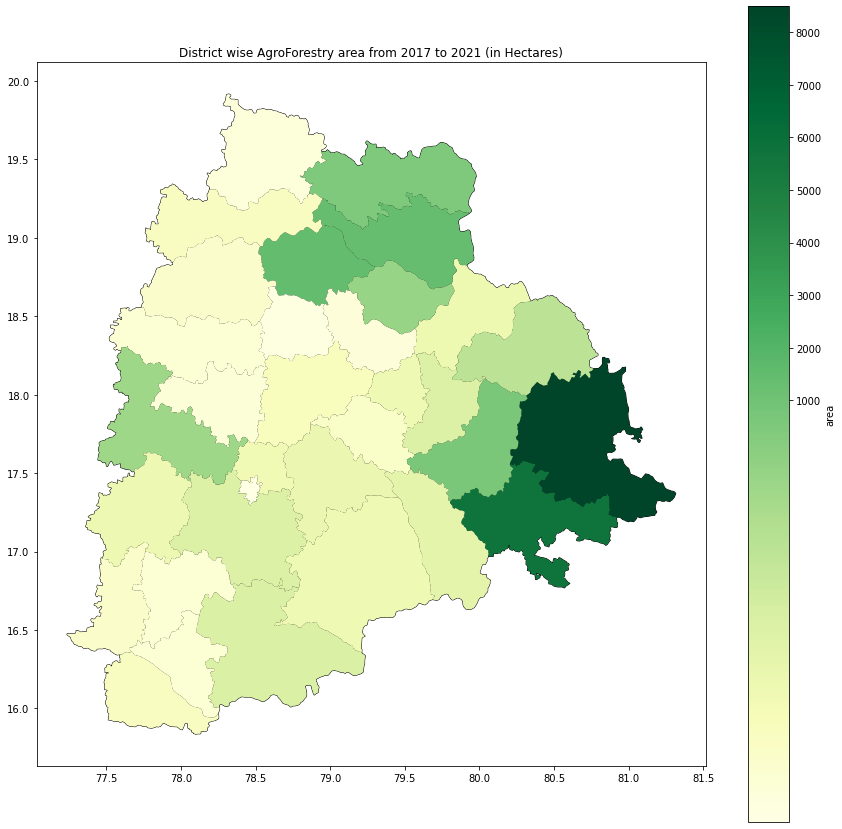

In [68]:
vmin, vmax = dist_geo['area17_21'].min() , dist_geo['area17_21'].max()
vcenter = dist_geo['area17_21'].mean()
norm = TwoSlopeNorm(vmin= vmin , vcenter=vcenter, vmax= vmax) 
# create a normalized colorbar
cmap = 'YlGn'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
base = dist_geo.plot(color='white', edgecolor='black',figsize = [15,15])
dist_geo.plot(ax = base,
    column = 'area17_21', 
                    legend = True, 
                    figsize = [15,15],\
                    legend_kwds = {'label': 'area'}, 
                    cmap = cmap,
        norm = norm)
plt.title('District wise AgroForestry area from 2017 to 2021 (in Hectares)')
plt.savefig('agro2017_21_dist.png', bbox_inches='tight')

District wise DPPD scores calculation and plot

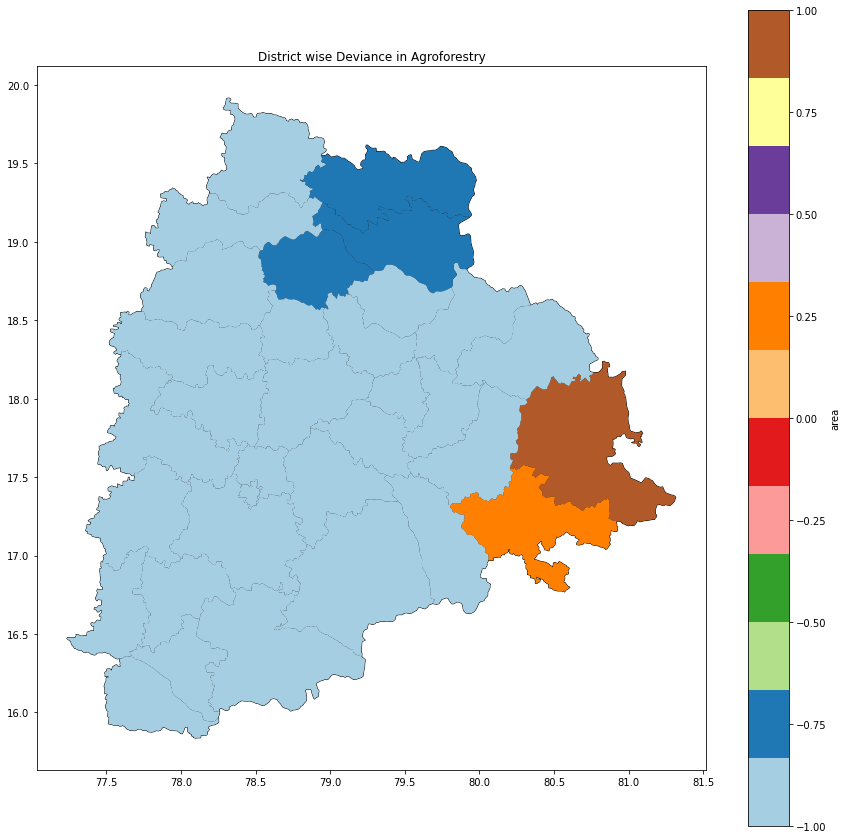

In [2]:
dist_geo = gpd.read_file('agroforest_dist.geojson') 
deviance = dist_geo[['area17_18','area17_19','area17_20','area17_21']]
deviance_T = deviance.transpose()

deviance_T = deviance_T.reset_index()
deviance_T['day'] = 1 
deviance_T['year'] = [2018, 2019, 2020, 2021]
deviance_T['month'] = 1
deviance_T['ModifiedDateTime'] = pd.to_datetime(deviance_T[['year', 'month', 'day']].astype('int64').astype('str'), yearfirst=True)
deviance_T['ModifiedDateTime_num'] = deviance_T['ModifiedDateTime'].map(dt.datetime.toordinal)

scores = []

for i in list(dist_geo.index):

    #Set the data in the right format for Linear Regression
    X = np.array(deviance_T['ModifiedDateTime_num'])
    X = X.reshape(-1, 1)
    y = np.array(deviance_T[i])
    y = y.reshape(-1, 1)

    #Perform Linear Regression and obtain the slope
    reg = LinearRegression().fit(X, y)
    y_pred_trend = reg.predict(X)
    slope, intercept = np.polyfit(np.array(deviance_T['ModifiedDateTime_num']), y_pred_trend,1)
    line_slope = slope[0]

    scores.append(line_slope)
    
scores = np.stack( scores, axis=0 )

norm = (scores - scores.min())/ (scores.max() - scores.min())
data_norm = (norm - 0.5)/ 0.5
dist_geo['deviance_5yr'] = list(data_norm)

# create a normalized colorbar
cmap = 'Paired'

base = dist_geo.plot(color='white', edgecolor='black',figsize = [15,15])
dist_geo.plot(ax = base,
    column = 'deviance_5yr', 
                    legend = True, 
                    figsize = [15,15],\
                    legend_kwds = {'label': 'area'}, 
                    cmap = cmap)
plt.title('District wise Deviance in Agroforestry')
plt.savefig('agro_dev_5yr_dist.png', bbox_inches='tight')

In [10]:
scores.min()

0.002263179015341307

Mandal and district wise deviance geodataframe

In [ ]:
geo = geo[['Mandal_Nam','deviance_5yr','geometry']]
dist_geo = dist_geo[['Dist_Name','deviance_5yr','geometry']]

Save geodataframes as geojson

In [ ]:
geo.to_file('agroforest_deviance_mandal.geojson', driver='GeoJSON')    #save areas' geodataframe
dist_geo.to_file('agroforest_deviance_dist.geojson', driver='GeoJSON')    #save areas' geodataframe

In [9]:
geo = gpd.read_file('agroforest_mandal.geojson')                    #Read mandal agroforestry area geodataframe
geo1 = gpd.read_file('agroforest_deviance_mandal.geojson')          #Read mandal agroforestry deviance geodataframe

#Create dataframe containing calculate agroforestry area and deviance
geo['Deviance'] = list(geo1['deviance_5yr'])                
geo = geo.sort_values(by=['Deviance'], ascending=False)
geo = pd.DataFrame(geo.head(5))
del geo['geometry']
geo = geo[['Mandal_Nam','Dist_Name','area17_18','area17_19','area17_20','area17_21','Deviance']]
geo


,Mandal_Nam,Dist_Name,area17_18,area17_19,area17_20,area17_21,Deviance
116,Dammapeta,Bhadradri Kothagudem,191.38,610.28,2464.08,2979.39,1.000000
29,Aswaraopeta,Bhadradri Kothagudem,431.46,834.32,2250.96,2305.81,0.383043
487,Sathupally,Khammam,43.63,309.67,683.21,849.03,-0.441674
361,Mulakalapally,Bhadradri Kothagudem,188.42,255.33,794.09,796.25,-0.524675
145,Enkoor,Khammam,19.98,676.83,586.51,727.71,-0.588620


<AxesSubplot:>

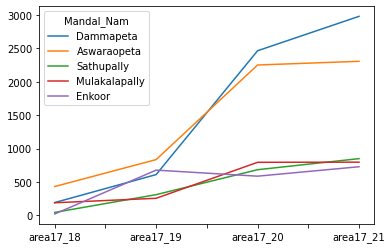

In [8]:
#Plot graph of top 5 mandals

geo = geo.set_index('Mandal_Nam')
geo = geo.transpose()
geo.plot()

In [3]:
geo = gpd.read_file('agroforest_dist.geojson')                      #Read districts agroforestry area geodataframe
geo1 = gpd.read_file('agroforest_deviance_dist.geojson')            #Read mandal agroforestry deviance geodataframe

#Create dataframe containing calculate agroforestry area and deviance
geo['Deviance'] = list(geo1['deviance_5yr'])
geo = geo.sort_values(by=['Deviance'], ascending=False)
geo = pd.DataFrame(geo.head(5))
del geo['geometry']
geo = geo[['Dist_Name','area17_18','area17_19','area17_20','area17_21']]
geo

,Dist_Name,area17_18,area17_19,area17_20,area17_21
1,Bhadradri Kothagudem,1129.76,2557.80,7251.68,8489.92
9,Khammam,554.42,4660.53,4886.30,5761.17
3,Jagtial,166.68,391.95,1053.40,1423.26
13,Mancherial,214.16,536.86,871.15,1368.81
10,Kumurambheem Asifabad,73.43,326.62,1086.02,713.15


<AxesSubplot:>

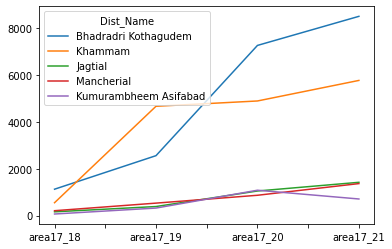

In [51]:
#Plot graph of top 5 districts
geo = geo[['Dist_Name','area17_18','area17_19','area17_20','area17_21']]
geo = geo.set_index('Dist_Name')
geo = geo.transpose()
geo.plot()